# Limpieza de datos con PySpark: Data Science Job Posting on Glassdoor

Los [datos](https://tajamar365.sharepoint.com/:x:/s/3405-MasterIA2024-2025/ETYTQ0c-i6FLjM8rZ4iT1cgB6ipFAkainM-4V9M8DXsBiA?e=PeMtvh) fueron extraídos (scrapeados) del sitio web de Glassdoor y recoge los salarios de distintos puestos relacionados a Data.

### Resolver los siguientes requerimientos, para cada operación/moficación imprima como van quedadndo los cambios.

1. Cargar los datos y mostrar el esquema o la informacion de las columnas y el tip de dato de cada columna

In [0]:
from pyspark.sql import (
    SparkSession,
    types,
    functions as F,
)

spark = (
    SparkSession
    .builder
    .appName('cleaning_orders_dataset_with_pyspark')
    .getOrCreate()
)

In [0]:
#df = spark.read.csv("/FileStore/caso_4/ds_jobs.csv", header=True)
#df = spark.read.option("delimiter", ";").option("quote", "\"").csv("/FileStore/caso_4/ds_jobs.csv", header=True, inferSchema=True)

df = spark.read.option("header", "true") \
               .option("delimiter", ";") \
               .option("multiline", "true") \
               .option("quote", "\"") \
               .option("escape", "\"") \
               .csv("/FileStore/caso_4/ds_jobs.csv")
df.printSchema()
df.count()

root
 |-- index: string (nullable = true)
 |-- Job Title: string (nullable = true)
 |-- Salary Estimate: string (nullable = true)
 |-- Job Description: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- Company Name: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Headquarters: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Founded: string (nullable = true)
 |-- Type of ownership: string (nullable = true)
 |-- Industry: string (nullable = true)
 |-- Sector: string (nullable = true)
 |-- Revenue: string (nullable = true)
 |-- Competitors: string (nullable = true)

Out[3]: 678

In [0]:
df.show(2)

+-----+-----------------+--------------------+--------------------+------+----------------+-------------+------------+--------------------+-------+--------------------+--------------------+-----------------+--------------------+--------------------+
|index|        Job Title|     Salary Estimate|     Job Description|Rating|    Company Name|     Location|Headquarters|                Size|Founded|   Type of ownership|            Industry|           Sector|             Revenue|         Competitors|
+-----+-----------------+--------------------+--------------------+------+----------------+-------------+------------+--------------------+-------+--------------------+--------------------+-----------------+--------------------+--------------------+
|    0|Sr Data Scientist|$137K-$171K (Glas...|Description\n\nTh...|    31|Healthfirst\n3.1| New York, NY|New York, NY|1001 to 5000 empl...|   1993|Nonprofit Organiz...|  Insurance Carriers|        Insurance|Unknown / Non-App...|EmblemHealth, Uni...|


2. Eliminar duplicados

In [0]:
df = df.dropDuplicates()
df.count()

Out[5]: 678

3. Decidir que hacer con los datos faltantes 

In [0]:
#eliminar que tenga null
df = df.dropna() 


4. Decidir que hacer con los valores nulos

5. ¿Cuántos registros tiene el csv?

In [0]:
df.count()


Out[7]: 677

6. Mostrar los valores únicos de `Job title` 

In [0]:
df.select("Job Title").distinct().show()



+--------------------+
|           Job Title|
+--------------------+
|Business Intellig...|
|        Data Modeler|
|Senior Research S...|
|   Sr Data Scientist|
|Data Scientist/Ma...|
|Data Scientist / ...|
|Associate Data Sc...|
|Medical Lab Scien...|
|Human Factors Sci...|
|Experienced Data ...|
|     Data Analyst II|
|      Data Scientist|
|        Data Analyst|
|Senior Analyst/Da...|
|Data Scientist-Hu...|
|Data Scientist - ...|
|Data Scientist - ...|
|Business Intellig...|
|Staff Data Scient...|
|Data Scientist - ...|
+--------------------+
only showing top 20 rows



In [0]:
unique_count = df.select("Job Title").distinct().count()
print(f'Número de valores únicos en Job Title: {unique_count}')

Número de valores únicos en Job Title: 173


7. Remover la letra `K` de la columna `Salary Estimate` y multiplicar por 1000.

In [0]:
df.select("Salary Estimate").distinct().show()


+--------------------+
|     Salary Estimate|
+--------------------+
|$79K-$131K (Glass...|
|$101K-$165K (Glas...|
|$137K-$171K (Glas...|
|$75K-$131K (Glass...|
|$112K-$116K (Glas...|
|$145K-$225K(Emplo...|
|$56K-$97K (Glassd...|
|$124K-$198K (Glas...|
|$69K-$116K (Glass...|
|$90K-$124K (Glass...|
|$110K-$163K (Glas...|
|$91K-$150K (Glass...|
|$71K-$123K (Glass...|
|$79K-$106K (Glass...|
|$122K-$146K (Glas...|
|$141K-$225K (Glas...|
|$90K-$109K (Glass...|
|$99K-$132K (Glass...|
|$79K-$133K (Glass...|
|$31K-$56K (Glassd...|
+--------------------+
only showing top 20 rows



In [0]:
df  = df.fillna({"Salary Estimate": "0"}) # si hay null

In [0]:
from pyspark.sql.functions import col, regexp_replace, split, udf
from pyspark.sql.types import FloatType

# Limpiar la columna Salary Estimate, eliminando cualquier cosa que no sea número
df= df.withColumn(
    "Salary Estimate Cleaned", 
    regexp_replace(col("Salary Estimate"), r"[^0-9\-]", "")  # Eliminar todo excepto números y el guion
)

# Mostrar el resultado de la limpieza
df.select("Salary Estimate", "Salary Estimate Cleaned").show()

+--------------------+-----------------------+
|     Salary Estimate|Salary Estimate Cleaned|
+--------------------+-----------------------+
|$75K-$131K (Glass...|                 75-131|
|$91K-$150K (Glass...|                 91-150|
|$145K-$225K(Emplo...|                145-225|
|$79K-$131K (Glass...|                 79-131|
|$56K-$97K (Glassd...|                  56-97|
|$69K-$116K (Glass...|                 69-116|
|$105K-$167K (Glas...|                105-167|
|$137K-$171K (Glas...|                137-171|
|$90K-$109K (Glass...|                 90-109|
|$101K-$165K (Glas...|                101-165|
|$145K-$225K(Emplo...|                145-225|
|$101K-$165K (Glas...|                101-165|
|$31K-$56K (Glassd...|                  31-56|
|$138K-$158K (Glas...|                138-158|
|$92K-$155K (Glass...|                 92-155|
|$75K-$131K (Glass...|                 75-131|
|$75K-$131K (Glass...|                 75-131|
|$66K-$112K (Glass...|                 66-112|
|$79K-$106K (

In [0]:
from pyspark.sql.functions import split
#estoy no me ha salido volver mas tarde
# Dividir la columna 'Salary Estimate Cleaned' por el guion
df_split = df.withColumn(
    "Salary Split", 
    (col("Salary Estimate Cleaned")[0].cast("int") * 1000).cast("string") +
    "-" + 
    (col("Salary Estimate Cleaned")[1].cast("int") * 1000).cast("string")
)

df_split.select("Salary Estimate", "Salary Estimate Cleaned", "Salary Split").show()

---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
File <command-1267387384416330>:4
      1 from pyspark.sql.functions import split
      2 #estoy no me ha salido volver mas tarde
      3 # Dividir la columna 'Salary Estimate Cleaned' por el guion
----> 4 df_split = df.withColumn(
      5     "Salary Split", 
      6     (col("Salary Estimate Cleaned")[0].cast("int") * 1000).cast("string") +
      7     "-" + 
      8     (col("Salary Estimate Cleaned")[1].cast("int") * 1000).cast("string")
      9 )
     11 df_split.select("Salary Estimate", "Salary Estimate Cleaned", "Salary Split").show()

File /databricks/spark/python/pyspark/instrumentation_utils.py:48, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     46 start = time.perf_counter()
     47 try:
---> 48     res = func(*args, **kwargs)
     49     logger.log_success(
     50         module_name, class_name, function_name, ti

8. Mostrar los valores únicos del campo `Salary Estimate`

In [0]:
df.select("Salary Estimate", "Salary Estimate Cleaned").distinct().show()


+--------------------+-----------------------+
|     Salary Estimate|Salary Estimate Cleaned|
+--------------------+-----------------------+
|$79K-$131K (Glass...|                 79-131|
|$80K-$132K (Glass...|                 80-132|
|$79K-$106K (Glass...|                 79-106|
|$212K-$331K (Glas...|                212-331|
|$137K-$171K (Glas...|                137-171|
|$69K-$116K (Glass...|                 69-116|
|$66K-$112K (Glass...|                 66-112|
|$56K-$97K (Glassd...|                  56-97|
|$124K-$198K (Glas...|                124-198|
|$31K-$56K (Glassd...|                  31-56|
|$91K-$150K (Glass...|                 91-150|
|$101K-$165K (Glas...|                101-165|
|$90K-$124K (Glass...|                 90-124|
|$92K-$155K (Glass...|                 92-155|
|$105K-$167K (Glas...|                105-167|
|$75K-$131K (Glass...|                 75-131|
|$79K-$133K (Glass...|                 79-133|
|$90K-$109K (Glass...|                 90-109|
|$138K-$158K 

9. Eliminar `(Glassdoor est.)` y `(Employer est.)` del campo `Salary Estimate`

In [0]:
df= df.withColumn(
    "Salary Estimate Cleaned", 
    regexp_replace(col("Salary Estimate"), r"[^0-9\-]", "")  # Eliminar todo excepto números y el guion
)

df.select("Salary Estimate", "Salary Estimate Cleaned").show()

+--------------------+-----------------------+
|     Salary Estimate|Salary Estimate Cleaned|
+--------------------+-----------------------+
|$75K-$131K (Glass...|                 75-131|
|$91K-$150K (Glass...|                 91-150|
|$145K-$225K(Emplo...|                145-225|
|$79K-$131K (Glass...|                 79-131|
|$56K-$97K (Glassd...|                  56-97|
|$69K-$116K (Glass...|                 69-116|
|$105K-$167K (Glas...|                105-167|
|$137K-$171K (Glas...|                137-171|
|$90K-$109K (Glass...|                 90-109|
|$101K-$165K (Glas...|                101-165|
|$145K-$225K(Emplo...|                145-225|
|$101K-$165K (Glas...|                101-165|
|$31K-$56K (Glassd...|                  31-56|
|$138K-$158K (Glas...|                138-158|
|$92K-$155K (Glass...|                 92-155|
|$75K-$131K (Glass...|                 75-131|
|$75K-$131K (Glass...|                 75-131|
|$66K-$112K (Glass...|                 66-112|
|$79K-$106K (

10. Mostrar de mayor a menor los valores del campo `Salary Estimate`

In [0]:
from pyspark.sql.functions import min, max, col, split

# Separar el rango de salario en dos columnas de enteros
df = df.withColumn(
    "Salary Min", split(col("Salary Estimate Cleaned"), "-")[0].cast("int")
).withColumn(
    "Salary Max", split(col("Salary Estimate Cleaned"), "-")[1].cast("int")
)

# Mostrar las primeras filas para verificar
df.select("Salary Estimate", "Salary Estimate Cleaned", "Salary Min", "Salary Max").show(truncate=False)

# Calcular el valor mínimo y máximo de las columnas Salary Min y Salary Max
df_min = df.agg(min(col("Salary Min")).alias("minimo"))
df_max = df.agg(max(col("Salary Max")).alias("maximo"))

# Mostrar los valores mínimos y máximos
df_min.show()
df_max.show()

+----------------------------+-----------------------+----------+----------+
|Salary Estimate             |Salary Estimate Cleaned|Salary Min|Salary Max|
+----------------------------+-----------------------+----------+----------+
|$75K-$131K (Glassdoor est.) |75-131                 |75        |131       |
|$91K-$150K (Glassdoor est.) |91-150                 |91        |150       |
|$145K-$225K(Employer est.)  |145-225                |145       |225       |
|$79K-$131K (Glassdoor est.) |79-131                 |79        |131       |
|$56K-$97K (Glassdoor est.)  |56-97                  |56        |97        |
|$69K-$116K (Glassdoor est.) |69-116                 |69        |116       |
|$105K-$167K (Glassdoor est.)|105-167                |105       |167       |
|$137K-$171K (Glassdoor est.)|137-171                |137       |171       |
|$90K-$109K (Glassdoor est.) |90-109                 |90        |109       |
|$101K-$165K (Glassdoor est.)|101-165                |101       |165       |

In [0]:

#estoy lo he hecho yo pero no esta bien la logica o no lo hace bien 
from pyspark.sql.functions import min, col, max

df_min = df.agg(min(col("Salary Estimate Cleaned")).alias("minimo"))
df_max = df.agg(max(col("Salary Estimate Cleaned")).alias("maximo"))

df_min.show()
df_max.show()

+------+
|minimo|
+------+
|     0|
+------+

+------+
|maximo|
+------+
|99-132|
+------+



11. De la columna `Job Description` quitar los saltos de linea `\n` del texto

In [0]:
# Eliminar los saltos de línea de la columna "Job Description"
df = df.withColumn(
    "Job Description Cleaned", 
    regexp_replace(col("Job Description"), "\n", " ")  # Reemplaza los saltos de línea por un espacio
)

# Mostrar el resultado
df.select("Job Description", "Job Description Cleaned").show()

+--------------------+-----------------------+
|     Job Description|Job Description Cleaned|
+--------------------+-----------------------+
|Responsibilities\...|   Responsibilities ...|
|Ready to write th...|   Ready to write th...|
|Job Success Profi...|   Job Success Profi...|
|*Organization and...|   *Organization and...|
|JOB DESCRIPTION:\...|   JOB DESCRIPTION: ...|
|Description\n\nTh...|   Description  The ...|
|Join our team ded...|   Join our team ded...|
|Data Scientist\nA...|   Data Scientist Af...|
|Secure our Nation...|   Secure our Nation...|
|Intuit is seeking...|   Intuit is seeking...|
|We are an ambitio...|   We are an ambitio...|
|The Data Analyst ...|   The Data Analyst ...|
|*******Please App...|   *******Please App...|
|Introduction\n\nH...|   Introduction  Hav...|
|POSITION PURPOSE:...|   POSITION PURPOSE:...|
|Position Descript...|   Position Descript...|
|Posting Title\nDa...|   Posting Title Dat...|
|About Us:\n\nHead...|   About Us:  Headqu...|
|About Us\n\n

12. De la columna `Rating` muestre los valores unicos.

In [0]:
df.select("Rating").distinct().show()

+------+
|Rating|
+------+
|    29|
|    42|
|    34|
|    28|
|    22|
|    35|
|    47|
|    43|
|    31|
|    27|
|    41|
|    38|
|    44|
|    33|
|    48|
|    32|
|    36|
|    37|
|    39|
|    50|
+------+
only showing top 20 rows



13. Del campo `Rating` reemplazar los `-1.0` por `0.0`.

In [0]:
from pyspark.sql.functions import when, col

# Reemplazar -1.0 por 0.0 en la columna Rating
df = df.withColumn(
    "Rating", 
    when(col("Rating") == -1.0, 0.0).otherwise(col("Rating"))
)

# Mostrar el resultado
df.select("Rating").show()


+------+
|Rating|
+------+
|    35|
|    36|
|    35|
|    37|
|    35|
|    31|
|    45|
|    29|
|    42|
|    44|
|    41|
|    42|
|    44|
|    35|
|    31|
|    34|
|    39|
|    42|
|    47|
|    32|
+------+
only showing top 20 rows



In [0]:
df.filter(col("Rating") == 0.0).count()


Out[20]: 50

14. Mostrar los valores unicos y ordenar los valores del campo `Company Name`.

In [0]:
df.select("Company Name").distinct().show()

+--------------------+
|        Company Name|
+--------------------+
|    Healthfirst\n3.1|
|         iRobot\n3.5|
|     Triplebyte\n3.2|
|    HG Insights\n4.2|
|   Tower Health\n3.5|
|Guzman & Griffin ...|
|        Buckman\n3.5|
|XSELL Technologie...|
|        ManTech\n4.2|
|  Intuit - Data\n4.4|
|        Novetta\n4.5|
|           PNNL\n3.7|
| Analysis Group\n3.8|
|Affinity Solution...|
|Old World Industr...|
|       1904labs\n4.7|
|Upside Business T...|
|       Novartis\n3.9|
|        INFICON\n3.5|
|Insight Enterpris...|
+--------------------+
only showing top 20 rows



15. Quitar todos los caracteres innecesarios que encuentres en el campo `Company Name`. Por ejemplo los saltos de linea `\n`

In [0]:
df = df.withColumn(
    "Company Name Cleaned", 
    regexp_replace(col("Company Name"), "\n", " ") 
)

# Mostrar el resultado
df.select("Company Name", "Company Name Cleaned").show()

+--------------------+--------------------+
|        Company Name|Company Name Cleaned|
+--------------------+--------------------+
|   Tower Health\n3.5|    Tower Health 3.5|
|XSELL Technologie...|XSELL Technologie...|
|        Buckman\n3.5|         Buckman 3.5|
|           PNNL\n3.7|            PNNL 3.7|
|        INFICON\n3.5|         INFICON 3.5|
|    Healthfirst\n3.1|     Healthfirst 3.1|
|        Novetta\n4.5|         Novetta 4.5|
|Affinity Solution...|Affinity Solution...|
|        ManTech\n4.2|         ManTech 4.2|
|  Intuit - Data\n4.4|   Intuit - Data 4.4|
|Upside Business T...|Upside Business T...|
|Insight Enterpris...|Insight Enterpris...|
|Guzman & Griffin ...|Guzman & Griffin ...|
|         iRobot\n3.5|          iRobot 3.5|
|Old World Industr...|Old World Industr...|
|Mathematica Polic...|Mathematica Polic...|
|       Novartis\n3.9|        Novartis 3.9|
|    HG Insights\n4.2|     HG Insights 4.2|
|       1904labs\n4.7|        1904labs 4.7|
|     Triplebyte\n3.2|      Trip

16. En el campo `Location` convertir esa columna en dos: `City` y `State`. Las ciudades que tengas en `Location` asignar a la columna `City`. Lo mismo para `State`. Luego elimine la columna `Location`.

In [0]:

# Suponiendo que la columna 'Location' tiene el formato 'City, State'
df = df.withColumn(
    "City", 
    split(col("Location"), ",")[0]  
).withColumn(
    "State", 
    split(col("Location"), ",")[1]  
).drop("Location")  # Eliminar la columna original 'Location'

# Mostrar el resultado
df.select("City", "State").show()

+-------------+-----+
|         City|State|
+-------------+-----+
|   West Grove|   PA|
|      Chicago|   IL|
|      Memphis|   TN|
|     Richland|   WA|
|       Newton|   MA|
|     New York|   NY|
|      Herndon|   VA|
|     New York|   NY|
|    Chantilly|   VA|
|    San Diego|   CA|
|       Remote| null|
|        Plano|   TX|
|   Washington|   DC|
|      Bedford|   MA|
|   Northbrook|   IL|
|   Washington|   DC|
|    Cambridge|   MA|
|Santa Barbara|   CA|
|  Saint Louis|   MO|
|     New York|   NY|
+-------------+-----+
only showing top 20 rows



17. Repetir la misma lógica de la pregunta 16 pero para el campo `Headquarters`. En Headquarters dejar solo la ciudad, mientras que para el estado añadirla a una columna nueva ` Headquarter State`.

In [0]:
df = df.withColumn(
    "Headquarter State", 
    split(col("Headquarters"), ",")[0]  
).drop("Headquarters")

# Mostrar el resultado
df.select("Headquarter State").show()

+-----------------+
|Headquarter State|
+-----------------+
|          Reading|
|          Chicago|
|          Memphis|
|         Richland|
|        Bad Ragaz|
|         New York|
|          Mc Lean|
|         New York|
|          Herndon|
|    Mountain View|
|       Washington|
|            Tempe|
|     Mays Landing|
|          Bedford|
|       Northbrook|
|        Princeton|
|            Basel|
|    Santa Barbara|
|      Saint Louis|
|    San Francisco|
+-----------------+
only showing top 20 rows



18. Muestre los valores únicos del campo `Headquarter State` 

In [0]:
df.select("Headquarter State").distinct().show()

+-----------------+
|Headquarter State|
+-----------------+
|            Tempe|
|       Menlo Park|
|         Richland|
|    San Francisco|
|        Princeton|
|          Memphis|
|       Washington|
|        Bad Ragaz|
|          Chicago|
|          Herndon|
|          Bedford|
|          Mc Lean|
|     Mays Landing|
|          Reading|
|      Saint Louis|
|       Northbrook|
|    Santa Barbara|
|            Basel|
|         New York|
|    Mountain View|
+-----------------+
only showing top 20 rows



19. Mostrar valores unicos del campo `Size`.

In [0]:
df.select("Size").distinct().show()

+--------------------+
|                Size|
+--------------------+
|                  -1|
|5001 to 10000 emp...|
|                   0|
|             Unknown|
| 51 to 200 employees|
|1001 to 5000 empl...|
|501 to 1000 emplo...|
|201 to 500 employees|
|    10000+ employees|
|   1 to 50 employees|
+--------------------+



20. Quitar 'employee' de los registros del campo `Size`. Elimine tambien otros caracteres basura.

In [0]:
# Limpiar la columna Size
df = df.withColumn(
    "Size Cleaned", 
    regexp_replace(col("Size"), r"employees", "")  # Eliminar la palabra 'employee'
)

# Opcional: Eliminar otros caracteres no deseados (por ejemplo, puntuaciones o espacios)
df = df.withColumn(
    "Size Cleaned", 
    regexp_replace(col("Size Cleaned"), r"[^a-zA-Z0-9\s]", "")  # Eliminar caracteres no alfanuméricos (excepto espacios)
)

# Mostrar el resultado
df.select("Size", "Size Cleaned").show(truncate=False)

+-----------------------+--------------+
|Size                   |Size Cleaned  |
+-----------------------+--------------+
|5001 to 10000 employees|5001 to 10000 |
|51 to 200 employees    |51 to 200     |
|1001 to 5000 employees |1001 to 5000  |
|1001 to 5000 employees |1001 to 5000  |
|501 to 1000 employees  |501 to 1000   |
|1001 to 5000 employees |1001 to 5000  |
|501 to 1000 employees  |501 to 1000   |
|51 to 200 employees    |51 to 200     |
|5001 to 10000 employees|5001 to 10000 |
|5001 to 10000 employees|5001 to 10000 |
|51 to 200 employees    |51 to 200     |
|5001 to 10000 employees|5001 to 10000 |
|1 to 50 employees      |1 to 50       |
|1001 to 5000 employees |1001 to 5000  |
|201 to 500 employees   |201 to 500    |
|1001 to 5000 employees |1001 to 5000  |
|10000+ employees       |10000         |
|51 to 200 employees    |51 to 200     |
|51 to 200 employees    |51 to 200     |
|51 to 200 employees    |51 to 200     |
+-----------------------+--------------+
only showing top

21. Reemplazar la palabra 'to' por '-' en todos los registros del campo `Size`. Reemplazar tambien '-1' por 'Unknown'. 

In [0]:
# Reemplazar 'to' por '-' y '-1' por 'Unknown' en la columna Size
df =df.withColumn(
    "Size Cleaned", 
    regexp_replace(
        regexp_replace(col("Size Cleaned"), r"\bto\b", "-"),  # Reemplazar 'to' por '-'
        r"-1", "Unknown"  # Reemplazar '-1' por 'Unknown'
    )
)

# Mostrar el resultado
df.select("Size", "Size Cleaned").show(truncate=False)

+-----------------------+-------------+
|Size                   |Size Cleaned |
+-----------------------+-------------+
|5001 to 10000 employees|5001 - 10000 |
|51 to 200 employees    |51 - 200     |
|1001 to 5000 employees |1001 - 5000  |
|1001 to 5000 employees |1001 - 5000  |
|501 to 1000 employees  |501 - 1000   |
|1001 to 5000 employees |1001 - 5000  |
|501 to 1000 employees  |501 - 1000   |
|51 to 200 employees    |51 - 200     |
|5001 to 10000 employees|5001 - 10000 |
|5001 to 10000 employees|5001 - 10000 |
|51 to 200 employees    |51 - 200     |
|5001 to 10000 employees|5001 - 10000 |
|1 to 50 employees      |1 - 50       |
|1001 to 5000 employees |1001 - 5000  |
|201 to 500 employees   |201 - 500    |
|1001 to 5000 employees |1001 - 5000  |
|10000+ employees       |10000        |
|51 to 200 employees    |51 - 200     |
|51 to 200 employees    |51 - 200     |
|51 to 200 employees    |51 - 200     |
+-----------------------+-------------+
only showing top 20 rows



22. Mostrar el tipo de dato del campo `Type of ownership` y sus registros unicos.

In [0]:
# Mostrar el tipo de dato del campo 'Type of ownership'
print("Tipo de dato de 'Type of ownership':", df.schema["Type of ownership"].dataType)

# Mostrar los valores únicos en el campo 'Type of ownership'
df.select("Type of ownership").distinct().show(truncate=False)

Tipo de dato de 'Type of ownership': StringType()
+------------------------------+
|Type of ownership             |
+------------------------------+
|-1                            |
|Government                    |
|Subsidiary or Business Segment|
|Self-employed                 |
|Contract                      |
|Unknown                       |
|College / University          |
|Company - Private             |
|Nonprofit Organization        |
|Hospital                      |
|Private Practice / Firm       |
|Company - Public              |
|Other Organization            |
+------------------------------+



23. Cambiar '-1' por 'Unknown' en todos los registros del campo `Type of ownership`.

In [0]:
# Reemplazar '-1' por 'Unknown' en la columna 'Type of ownership'
df = df.withColumn(
    "Type of ownership", 
    when(col("Type of ownership") == "-1", "Unknown").otherwise(col("Type of ownership"))
)

# Mostrar el resultado
df.select("Type of ownership").distinct().show(truncate=False)

+------------------------------+
|Type of ownership             |
+------------------------------+
|Government                    |
|Subsidiary or Business Segment|
|Self-employed                 |
|Contract                      |
|Unknown                       |
|College / University          |
|Company - Private             |
|Nonprofit Organization        |
|Hospital                      |
|Private Practice / Firm       |
|Company - Public              |
|Other Organization            |
+------------------------------+



24. Cambiar:  
-  `Company - Public` por `Public Company`  
-  `Company - Private` por `Private Company`  
-  `Private Practice / Firm` por `Private Company`  
-  `Subsidiary or Business Segment` por `Business`  
-  `College / University` por `Education`  
En todos los registros del campo `Type of ownership`.

In [0]:
df = df.withColumn(
    "Type of ownership", 
    when(col("Type of ownership") == "Company - Public", "Public Company")
    .when(col("Type of ownership") == "Company - Private", "Private Company")
    .when(col("Type of ownership") == "Private Practice / Firm", "Private Company")
    .when(col("Type of ownership") == "Subsidiary or Business Segment", "Business")
    .when(col("Type of ownership") == "College / University", "Education")
    .otherwise(col("Type of ownership"))  # Mantener otros valores sin cambio
)

df.select("Type of ownership").distinct().show()

+--------------------+
|   Type of ownership|
+--------------------+
|           Education|
|          Government|
|       Self-employed|
|            Contract|
|             Unknown|
|     Private Company|
|Nonprofit Organiz...|
|            Hospital|
|      Public Company|
|            Business|
|  Other Organization|
+--------------------+



25. Mostrar el tipo de dato y los valores unicos del campo `Industry`.

In [0]:
print(f"Tipo de dato de la columna 'Industry': {df.schema['Industry'].dataType}")

# Mostrar los valores únicos de la columna 'Industry'
df.select("Industry").distinct().show(truncate=False)

Tipo de dato de la columna 'Industry': StringType()
+----------------------------------------+
|Industry                                |
+----------------------------------------+
|-1                                      |
|Investment Banking & Asset Management   |
|Insurance Carriers                      |
|Energy                                  |
|Advertising & Marketing                 |
|IT Services                             |
|Chemical Manufacturing                  |
|Enterprise Software & Network Solutions |
|Internet                                |
|Electrical & Electronic Manufacturing   |
|Express Delivery Services               |
|Utilities                               |
|Biotech & Pharmaceuticals               |
|Staffing & Outsourcing                  |
|Research & Development                  |
|Consulting                              |
|Federal Agencies                        |
|Computer Hardware & Software            |
|Consumer Electronics & Appliances Stores|
|A

26. En el mismo campo de `Industry` reemplazar '-1' por 'Not Available' y '&' por 'and'.  Vuelva a imprimir los valores unicos en orden alfabético.

In [0]:
df = df.withColumn(
    "Industry Cleaned",
    regexp_replace(regexp_replace(col("Industry"), "-1", "Not Available"), "&", "and")
)

# Mostrar los valores únicos de la columna 'Industry Cleaned' en orden alfabético
df.select("Industry Cleaned").distinct().orderBy("Industry Cleaned").show()

+--------------------+
|    Industry Cleaned|
+--------------------+
|          Accounting|
|Advertising and M...|
|Aerospace and Def...|
|Architectural and...|
|Banks and Credit ...|
|Biotech and Pharm...|
|Cable, Internet a...|
|Chemical Manufact...|
|Colleges and Univ...|
|Computer Hardware...|
|        Construction|
|          Consulting|
|Consumer Electron...|
|Consumer Products...|
|Department, Cloth...|
|Electrical and El...|
|              Energy|
|Enterprise Softwa...|
|Express Delivery ...|
|Farm Support Serv...|
+--------------------+
only showing top 20 rows



27. Para el campo `Sector`, muestre el tipo de dato y los valores únicos.

In [0]:
print(f"Tipo de dato de la columna 'Sector': {df.schema['Sector'].dataType}")

# Mostrar los valores únicos de la columna 'Industry'
df.select("Sector").distinct().show()

Tipo de dato de la columna 'Sector': StringType()
+--------------------+
|              Sector|
+--------------------+
|         Health Care|
|                  -1|
|           Education|
|           Insurance|
|Information Techn...|
|          Government|
|Oil, Gas, Energy ...|
|             Finance|
|         Real Estate|
|          Non-Profit|
|               Media|
|Biotech & Pharmac...|
|  Telecommunications|
|  Accounting & Legal|
|    Travel & Tourism|
| Aerospace & Defense|
|   Business Services|
|Agriculture & For...|
|              Retail|
|       Manufacturing|
+--------------------+
only showing top 20 rows



28. Aplica la misma lógica de la pregunta 26 pero sobre el campo `Sector`.

In [0]:
df = df.withColumn(
    "Sector Cleaned",
    regexp_replace(regexp_replace(col("Sector"), "-1", "Not Available"), "&", "and")
)

# Mostrar los valores únicos de la columna 'Industry Cleaned' en orden alfabético
df.select("Sector Cleaned").distinct().orderBy("Sector Cleaned").show()

+--------------------+
|      Sector Cleaned|
+--------------------+
|Accounting and Legal|
|Aerospace and Def...|
|Agriculture and F...|
|Biotech and Pharm...|
|   Business Services|
|Construction, Rep...|
|   Consumer Services|
|           Education|
|             Finance|
|          Government|
|         Health Care|
|Information Techn...|
|           Insurance|
|       Manufacturing|
|               Media|
|          Non-Profit|
|       Not Available|
|Oil, Gas, Energy ...|
|         Real Estate|
|              Retail|
+--------------------+
only showing top 20 rows



29. Para el campo `Revenue`, muestre el tipo de dato y los valores únicos en orden ascedente.

In [0]:
print(f"Tipo de dato de la columna 'Revenue': {df.schema['Revenue'].dataType}")

# Mostrar los valores únicos de la columna 'Industry'
df.select("Revenue").distinct().show()

Tipo de dato de la columna 'Revenue': StringType()
+--------------------+
|             Revenue|
+--------------------+
|                  -1|
|$50 to $100 milli...|
|$100 to $500 mill...|
|                   0|
|$10 to $25 millio...|
|  $10+ billion (USD)|
|$1 to $5 million ...|
|$500 million to $...|
|Unknown / Non-App...|
|$25 to $50 millio...|
|$5 to $10 billion...|
|$5 to $10 million...|
|$2 to $5 billion ...|
|$1 to $2 billion ...|
|Less than $1 mill...|
+--------------------+



30. En el campo `Revenue`, cambiar:  
-  `-1` por `N/A`  
-  `Unknown / Non-Applicable` por `N/A`  
-  `Less than $1 million (USD)` por `Less than 1`
-  Quitar `$` y `(USD)`

In [0]:
# Reemplazar los valores específicos y limpiar la columna 'Industry'
df = df.withColumn(
    "Revenue Cleaned",
    regexp_replace(
        regexp_replace(
            regexp_replace(
                regexp_replace(col("Revenue"), "-1", "N/A"), 
                "Unknown / Non-Applicable", 
                "N/A"
            ), 
            "Less than \\$1 million \\(USD\\)", 
            "Less than 1"
        ),
        "\\$|\\(USD\\)", ""  # Eliminar $ y (USD)
    )
)

df.select("Revenue Cleaned").distinct().orderBy("Revenue Cleaned").show(truncate=False)

+-------------------------+
|Revenue Cleaned          |
+-------------------------+
|0                        |
|1 to 2 billion           |
|1 to 5 million           |
|10 to 25 million         |
|10+ billion              |
|100 to 500 million       |
|2 to 5 billion           |
|25 to 50 million         |
|5 to 10 billion          |
|5 to 10 million          |
|50 to 100 million        |
|500 million to 1 billion |
|Less than 1              |
|N/A                      |
+-------------------------+



31. Borrar el campo `Competitors`.

In [0]:
df = df.drop("Competitors")

# Mostrar el DataFrame sin la columna 'Competitors'
df.show()

+-----+--------------------+--------------------+--------------------+------+--------------------+--------------------+-------+--------------------+--------------------+--------------------+--------------------+-----------------------+----------+----------+-----------------------+--------------------+-------------+-----+-----------------+-------------+--------------------+--------------------+--------------------+
|index|           Job Title|     Salary Estimate|     Job Description|Rating|        Company Name|                Size|Founded|   Type of ownership|            Industry|              Sector|             Revenue|Salary Estimate Cleaned|Salary Min|Salary Max|Job Description Cleaned|Company Name Cleaned|         City|State|Headquarter State| Size Cleaned|    Industry Cleaned|      Sector Cleaned|     Revenue Cleaned|
+-----+--------------------+--------------------+--------------------+------+--------------------+--------------------+-------+--------------------+----------------

32. Crear tres columnas: `min_salary` (salario mínimo), `max_salary` (salario maximo) y `avg_salary` (salario promedio) a partir de los datos del campo `Salary Estimate`.

33. Mostrar los valores unicos del campo `Founded` y el tipo de dato.

In [0]:
print("Tipo de dato de 'Founded':")
df.select("Founded").printSchema()

# Mostrar los valores únicos de la columna "Founded"
df.select("Founded").distinct().show()

Tipo de dato de 'Founded':
root
 |-- Founded: string (nullable = true)

+-------+
|Founded|
+-------+
|   2016|
|   2012|
|   1988|
|   2017|
|   2014|
|   2000|
|   1965|
|   1981|
|   1968|
|   2011|
|   1997|
|   1973|
|   1996|
|   1983|
|   1986|
|   2015|
|   1998|
|   1993|
|   2010|
|   1990|
+-------+
only showing top 20 rows



34. Reemplazar '-1' por '2024' en todos los registros del campo `Founded`.

In [0]:
# Reemplazar '-1' por '2024' en la columna Founded
df = df.withColumn(
    "Founded", 
    when(col("Founded") == -1, 2024).otherwise(col("Founded"))
)

# Mostrar los primeros registros para verificar
df.select("Founded").show(truncate=False)

+-------+
|Founded|
+-------+
|2017   |
|2014   |
|1945   |
|1965   |
|2000   |
|1993   |
|2012   |
|1998   |
|1968   |
|1983   |
|2015   |
|1988   |
|1997   |
|1990   |
|1973   |
|1986   |
|1996   |
|2010   |
|2016   |
|2015   |
+-------+
only showing top 20 rows



35. Crear una nueva columna o campo que se llame `company_age` con los datos que se deducen del campo `Founded`.

In [0]:
# Calcular la edad de la empresa (año actual - año de Founded)
from pyspark.sql.functions import current_date, year

df = df.withColumn(
    "company_age",
    year(current_date()) - col("Founded")
)

# Mostrar el resultado
df.select("Founded", "company_age").show()

+-------+-----------+
|Founded|company_age|
+-------+-----------+
|   2012|       12.0|
|   2024|        0.0|
|   2005|       19.0|
|   1974|       50.0|
|   1965|       59.0|
|   2024|        0.0|
|   2024|        0.0|
|   2017|        7.0|
|   2013|       11.0|
|   1997|       27.0|
|   2015|        9.0|
|   1998|       26.0|
|   2024|        0.0|
|   2024|        0.0|
|   2024|        0.0|
|   1925|       99.0|
|   1973|       51.0|
|   1947|       77.0|
|   2012|       12.0|
|   2012|       12.0|
+-------+-----------+
only showing top 20 rows



36. Crear una columna o campo que se llame: `Job Type` y en cada registro debe ir Senior, Junior o NA según los datos del campo `Job Title`.  
- Cambiar 'sr' o 'senior' o 'lead' o 'principal' por `Senior` en el campo `Job Type`. No olvidar las mayúsculas.
- Cambiar 'jr' o 'jr.' o cualquier otra variante por `Junior`.  
- En cualquier otro caso distinto a los anteriores añadir NA.

In [0]:
df = df.withColumn(
    "Job Type",
    when(col("Job Title").rlike("(?i)sr|senior|lead|principal"), "Senior")  # Match para Senior
    .when(col("Job Title").rlike("(?i)jr|jr\\."), "Junior")  # Match para Junior
    .otherwise("NA")  # En cualquier otro caso, poner NA
)

# Mostrar el resultado
df.select("Job Title", "Job Type").show()

+--------------------+--------+
|           Job Title|Job Type|
+--------------------+--------+
|Medical Lab Scien...|      NA|
|      Data Scientist|      NA|
|      Data Scientist|      NA|
|Data Scientist - ...|      NA|
|      Data Scientist|      NA|
|   Sr Data Scientist|  Senior|
|      Data Scientist|      NA|
|      Data Scientist|      NA|
|      Data Scientist|      NA|
|Staff Data Scient...|      NA|
|Data Scientist - ...|      NA|
|     Data Analyst II|      NA|
|Experienced Data ...|      NA|
|      Data Scientist|      NA|
|        Data Modeler|      NA|
|      Data Scientist|      NA|
|Data Scientist / ...|      NA|
|      Data Scientist|      NA|
|      Data Scientist|      NA|
|      Data Scientist|      NA|
+--------------------+--------+
only showing top 20 rows



37. Muestra los registros únicos del campo `Job Type`. 

In [0]:
df.select("Job Type").distinct().show()

+--------+
|Job Type|
+--------+
|  Senior|
|      NA|
|  Junior|
+--------+



38. Partiendo del campo `Job Description` se extraer todas o las principales skills solicitadas por las empresas, por ejemplo: Python, Spark , Big Data. Cada Skill debe ir en una nueva columna de tipo Binaria ( 0 , 1) o Booleana (True,  False) de modo que cada skill va ser una nueva columna y si esa skill es solicitada por la empresa colocar 1 sino colocar 0. Por ejemplo:  

Por ejemplo:  
| Job Title         | Salary Estimate | Job Description                                 | Rating | Company Name       | Size       | Founded | Type of ownership         | Industry                       | Sector                         | Same State      | company_age | Python | Excel |
|--------------------|-----------------|-------------------------------------------------|--------|--------------------|------------|---------|---------------------------|--------------------------------|--------------------------------|----------------|-------------|--------|-------|
| Sr Data Scientist | 137000-171000   | Description The Senior Data Scientist is resp... | 3.1    | Healthfirst        | 1001-5000  | 1993    | Nonprofit Organization    | Insurance Carriers            | Insurance Carriers            | Same State      | 31          | 0      | 0     |
| Data Scientist    | 137000-171000   | Secure our Nation, Ignite your Future Join th... | 4.2    | ManTech            | 5001-10000 | 1968    | Public Company            | Research and Development      | Research and Development      | Same State      | 56          | 0      | 0     |
| Data Scientist    | 137000-171000   | Overview Analysis Group is one of the larges... | 3.8    | Analysis Group      | 1001-5000  | 1981    | Private Company           | Consulting                    | Consulting                    | Same State      | 43          | 1      | 1     |
| Data Scientist    | 137000-171000   | JOB DESCRIPTION: Do you have a passion for Da... | 3.5    | INFICON            | 501-1000   | 2000    | Public Company            | Electrical and Electronic Manufacturing | Electrical and Electronic Manufacturing | Different State | 24          | 1      | 1     |


In [0]:
# Definir las habilidades principales que queremos buscar
skills = ['Python', 'Spark', 'Big Data', 'SQL', 'Machine Learning', 'Java', 'Hadoop']

# Iterar sobre cada skill para crear una columna binaria
for skill in skills:
    df = df.withColumn(
        f"{skill}_present",  # Nombre de la nueva columna
        when(col("Job Description").rlike(f"(?i){skill}"), 1).otherwise(0)  # Si el skill está en el Job Description, 1, de lo contrario 0
    )

# Mostrar el DataFrame con las nuevas columnas
df.select("Job Description", *[f"{skill}_present" for skill in skills]).show()

+--------------------+--------------+-------------+----------------+-----------+------------------------+------------+--------------+
|     Job Description|Python_present|Spark_present|Big Data_present|SQL_present|Machine Learning_present|Java_present|Hadoop_present|
+--------------------+--------------+-------------+----------------+-----------+------------------------+------------+--------------+
|Responsibilities\...|             0|            0|               0|          0|                       0|           0|             0|
|Ready to write th...|             1|            0|               0|          1|                       1|           0|             0|
|Job Success Profi...|             1|            0|               0|          1|                       1|           1|             1|
|*Organization and...|             0|            0|               0|          0|                       1|           0|             0|
|JOB DESCRIPTION:\...|             1|            0|           

39. Exportar dataset final a csv

In [0]:
ruta = "/FileStore/caso_4/dataset2.csv"

df.write.option("header", "true").csv(ruta)

In [0]:
df.show(2)

+-----+--------------------+--------------------+--------------------+------+----------------+--------------------+-------+-----------------+--------------------+--------------------+--------------------+-----------------------+----------+----------+-----------------------+--------------------+-------------+-----+-----------------+------------+--------------------+--------------------+---------------+-----------+--------+--------------+-------------+----------------+-----------+------------------------+------------+--------------+--------------+--------------+
|index|           Job Title|     Salary Estimate|     Job Description|Rating|    Company Name|                Size|Founded|Type of ownership|            Industry|              Sector|             Revenue|Salary Estimate Cleaned|Salary Min|Salary Max|Job Description Cleaned|Company Name Cleaned|         City|State|Headquarter State|Size Cleaned|    Industry Cleaned|      Sector Cleaned|Revenue Cleaned|company_age|Job Type|Python_p

In [0]:
df.printSchema()

root
 |-- index: string (nullable = true)
 |-- Job Title: string (nullable = true)
 |-- Salary Estimate: string (nullable = false)
 |-- Job Description: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- Company Name: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Founded: string (nullable = true)
 |-- Type of ownership: string (nullable = true)
 |-- Industry: string (nullable = true)
 |-- Sector: string (nullable = true)
 |-- Revenue: string (nullable = true)
 |-- Salary Estimate Cleaned: string (nullable = false)
 |-- Salary Min: integer (nullable = true)
 |-- Salary Max: integer (nullable = true)
 |-- Job Description Cleaned: string (nullable = true)
 |-- Company Name Cleaned: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Headquarter State: string (nullable = true)
 |-- Size Cleaned: string (nullable = true)
 |-- Industry Cleaned: string (nullable = true)
 |-- Sector Cleaned: string (nullabl

40. Extraer todos los insights posibles que sean de valor o utilidad. Cree nuevas columnas, agrupar,  filtrar hacer varios plots que muestren dichos insights que sean de utilidad para una empresa o para un usuario. Elabore conclusiones con los insights encontrados. 

## 1. Distribución de Calificaciones de las Empresas (Rating)

<Figure size 720x432 with 0 Axes>

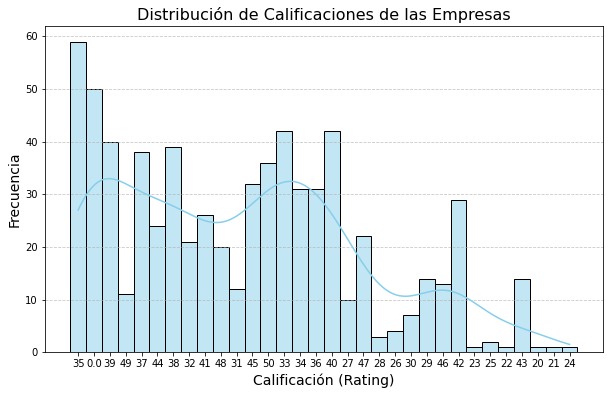

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# Convertir la columna Rating a una lista para usar con Matplotlib
rating_list = df.select("Rating").rdd.flatMap(lambda x: x).collect()

# Visualización con Matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(rating_list, bins=20, kde=True, color="skyblue")

plt.title("Distribución de Calificaciones de las Empresas", fontsize=16)
plt.xlabel("Calificación (Rating)", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## 2. Salarios Promedio por Título de Trabajo (Job Title)

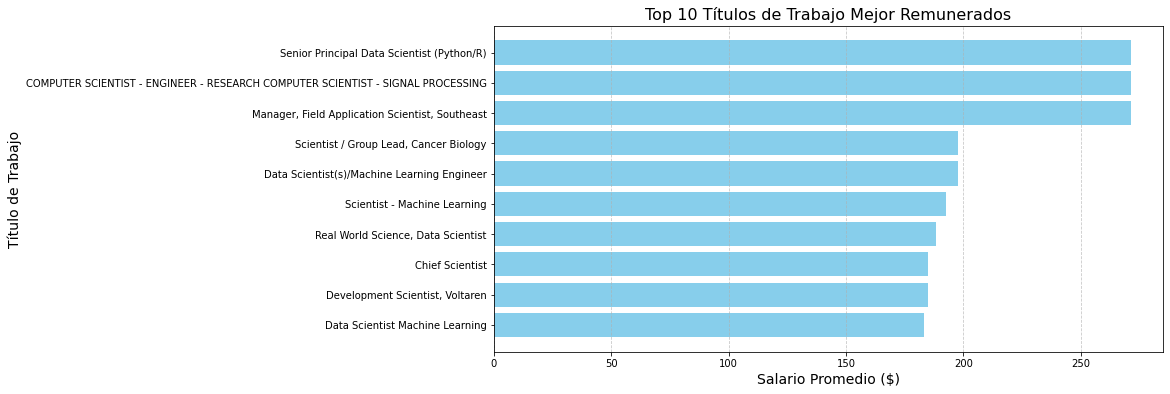

In [0]:
from pyspark.sql.functions import avg

# Calcular el salario promedio a partir de Salary Min y Salary Max
df = df.withColumn("Average_Salary", (col("Salary Min") + col("Salary Max")) / 2)

# Agrupar por título de trabajo y calcular el salario promedio
salary_avg_df = df.groupBy("Job Title").agg(avg("Average_Salary").alias("Average_Salary"))

# Seleccionar los 10 títulos de trabajo mejor remunerados
top_jobs = salary_avg_df.orderBy(col("Average_Salary").desc()).limit(10)

# Convertir a una lista para usar con Matplotlib
top_jobs_list = top_jobs.collect()

# Preparar datos para la visualización
job_titles = [row["Job Title"] for row in top_jobs_list]
avg_salaries = [row["Average_Salary"] for row in top_jobs_list]

# Visualización con Matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(job_titles, avg_salaries, color="skyblue")
plt.xlabel("Salario Promedio ($)", fontsize=14)
plt.ylabel("Título de Trabajo", fontsize=14)
plt.title("Top 10 Títulos de Trabajo Mejor Remunerados", fontsize=16)
plt.gca().invert_yaxis()  # Invertir el eje Y para que el mejor pagado esté arriba
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

## 3. Relación entre Tamaño de la Empresa (Size) y el Salario

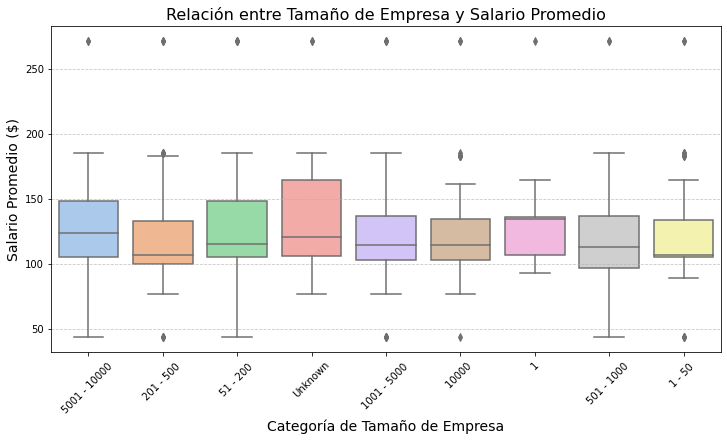

In [0]:
from pyspark.sql.functions import trim, collect_list,  split, col, regexp_extract, mean
import matplotlib.pyplot as plt
import seaborn as sns

# Separar el rango salarial en valores mínimo y máximo
df = df.withColumn("Salary Min", regexp_extract(col("Salary Estimate Cleaned"), r"(\d+)-", 1).cast("int"))
df = df.withColumn("Salary Max", regexp_extract(col("Salary Estimate Cleaned"), r"-(\d+)", 1).cast("int"))

# Calcular el salario promedio
df = df.withColumn("Average_Salary", (col("Salary Min") + col("Salary Max")) / 2)

# Filtrar filas con datos válidos
filtered_df = df.filter((col("Size Cleaned").isNotNull()) & (col("Average_Salary").isNotNull()))

# Agrupar los datos
grouped_data = filtered_df.groupBy("Size Cleaned").agg(collect_list("Average_Salary").alias("Salaries"))

# Recolectar datos para graficar
grouped_data_list = grouped_data.collect()

# Preparar datos para el gráfico
size_categories = [row["Size Cleaned"] for row in grouped_data_list]
salaries = [row["Salaries"] for row in grouped_data_list]

# Aplanar las listas para el gráfico y construir el DataFrame
import pandas as pd

plot_data = []
for category, salary_list in zip(size_categories, salaries):
    for salary in salary_list:
        plot_data.append((category, salary))

plot_df = pd.DataFrame(plot_data, columns=["Size Category", "Average Salary"])


plt.figure(figsize=(12, 6))
sns.boxplot(x="Size Category", y="Average Salary", data=plot_df, palette="pastel")

# Configuración del gráfico
plt.title("Relación entre Tamaño de Empresa y Salario Promedio", fontsize=16)
plt.xlabel("Categoría de Tamaño de Empresa", fontsize=14)
plt.ylabel("Salario Promedio ($)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()


## 4. Popularidad Industry



+-----------------------------------------+---------+
|Industry Cleaned                         |Job Count|
+-----------------------------------------+---------+
|Not Available                            |71       |
|Biotech and Pharmaceuticals              |66       |
|IT Services                              |61       |
|Computer Hardware and Software           |57       |
|Aerospace and Defense                    |47       |
|Enterprise Software and Network Solutions|43       |
|Consulting                               |39       |
|Staffing and Outsourcing                 |37       |
|Insurance Carriers                       |29       |
|Internet                                 |27       |
+-----------------------------------------+---------+
only showing top 10 rows



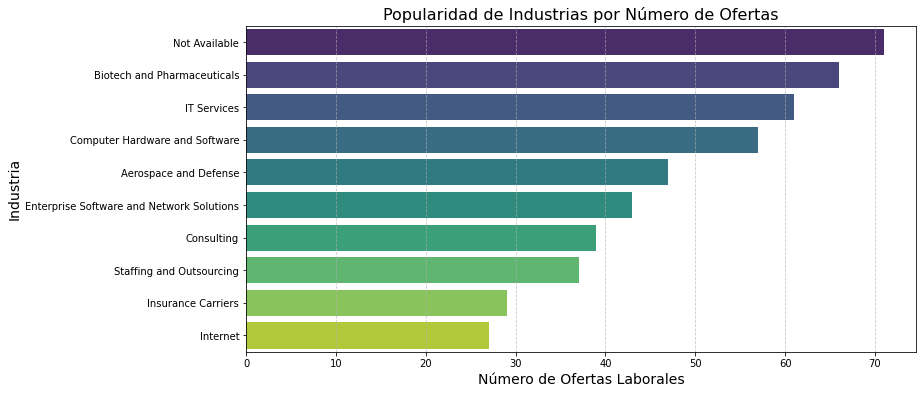

In [0]:
from pyspark.sql.functions import col, count

# Filtrar valores nulos en la columna Industry
industry_filtered = df.filter(col("Industry Cleaned").isNotNull())

# Agrupar por Industry y contar el número de trabajos
industry_counts = industry_filtered.groupBy("Industry Cleaned").agg(count("*").alias("Job Count"))

# Ordenar las industrias por número de trabajos en orden descendente
sorted_industries = industry_counts.orderBy(col("Job Count").desc())

# Mostrar las industrias principales en Spark DataFrame
sorted_industries.show(10, truncate=False)

# Recolectar los datos para la visualización
industry_data = sorted_industries.collect()

# Preparar datos para el gráfico
industries = [row["Industry Cleaned"] for row in industry_data]
job_counts = [row["Job Count"] for row in industry_data]

# Si hay demasiadas industrias, graficar solo las principales (opcional)
top_n = 10
industries = industries[:top_n]
job_counts = job_counts[:top_n]



plt.figure(figsize=(12, 6))
sns.barplot(x=job_counts, y=industries, palette="viridis")

# Configuración del gráfico
plt.title("Popularidad de Industrias por Número de Ofertas", fontsize=16)
plt.xlabel("Número de Ofertas Laborales", fontsize=14)
plt.ylabel("Industria", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()

## Análisis Geográfico: Localización de Trabajos (city y State)

+------------------+---------+
|Location          |Job Count|
+------------------+---------+
|San Francisco,  CA|69       |
|New York,  NY     |50       |
|Washington,  DC   |26       |
|Boston,  MA       |24       |
|Chicago,  IL      |22       |
|Herndon,  VA      |21       |
|Cambridge,  MA    |18       |
|McLean,  VA       |13       |
|United States     |11       |
|Chantilly,  VA    |11       |
+------------------+---------+
only showing top 10 rows



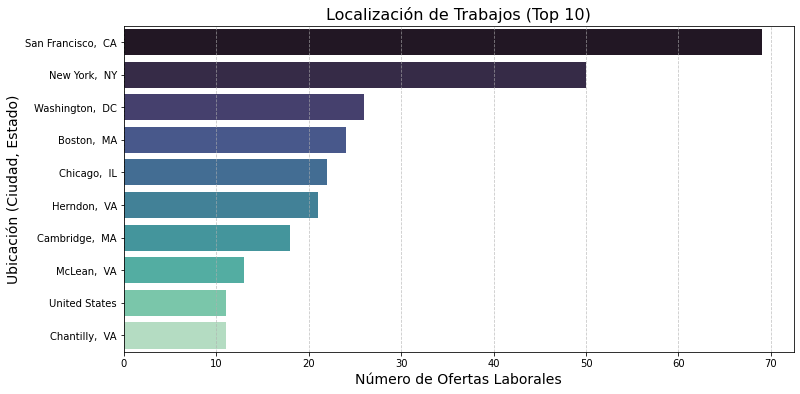

In [0]:
from pyspark.sql.functions import concat_ws, col, count

# Crear columna Location combinando City y State
df_with_location = df.withColumn("Location", concat_ws(", ", col("City"), col("State")))

# Filtrar valores nulos en Location
location_filtered = df_with_location.filter(col("Location").isNotNull())

# Agrupar por Location y contar trabajos
location_counts = location_filtered.groupBy("Location").agg(count("*").alias("Job Count"))

# Ordenar por número de trabajos
sorted_locations = location_counts.orderBy(col("Job Count").desc())

# Mostrar las principales ubicaciones
sorted_locations.show(10, truncate=False)

# Recolectar los datos para la visualización
location_data = sorted_locations.collect()

# Preparar datos para el gráfico
locations = [row["Location"] for row in location_data]
job_counts = [row["Job Count"] for row in location_data]

# Opcional: graficar solo las principales ubicaciones
top_n = 10
locations = locations[:top_n]
job_counts = job_counts[:top_n]

# Crear el gráfico
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=job_counts, y=locations, palette="mako")

# Configuración del gráfico
plt.title("Localización de Trabajos (Top 10)", fontsize=16)
plt.xlabel("Número de Ofertas Laborales", fontsize=14)
plt.ylabel("Ubicación (Ciudad, Estado)", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()

## 6. Relación entre Antigüedad de la Empresa (Founded) y Calificación

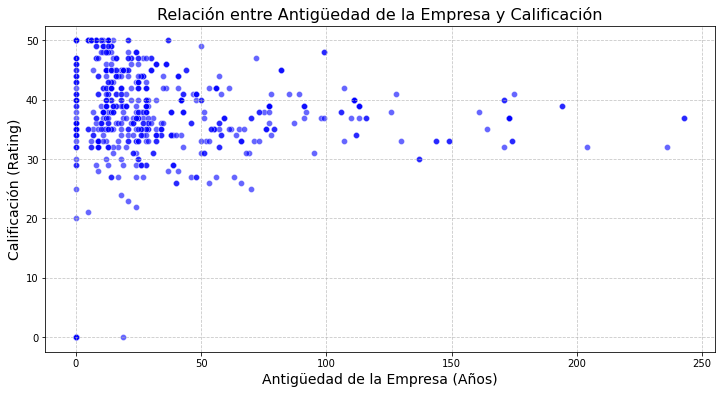

In [0]:

# Crear la columna de antigüedad
df_with_age = df.withColumn(
    "company_age",
    when(col("Founded").cast("int").isNotNull(), 2024 - col("Founded").cast("int"))
    .otherwise(None)
)

# Filtrar valores válidos de antigüedad y calificación
filtered_data = df_with_age.filter(
    (col("company_age").isNotNull()) & 
    (col("Rating").cast("float").isNotNull())
)

# Seleccionar columnas necesarias para el análisis
age_rating_data = filtered_data.select(col("company_age"), col("Rating").cast("float"))

# Recolectar los datos para visualización
age_rating_collected = age_rating_data.collect()

# Preparar los datos para graficar
company_age = [row["company_age"] for row in age_rating_collected]
ratings = [row["Rating"] for row in age_rating_collected]

# Crear el scatterplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(x=company_age, y=ratings, alpha=0.6, color="blue")

# Configurar el gráfico
plt.title("Relación entre Antigüedad de la Empresa y Calificación", fontsize=16)
plt.xlabel("Antigüedad de la Empresa (Años)", fontsize=14)
plt.ylabel("Calificación (Rating)", fontsize=14)
plt.grid(linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()

## 7. Sector Más Representado (Sector)



+--------------------+---------+------------------+
|      Sector Cleaned|job_count|        avg_salary|
+--------------------+---------+------------------+
|Information Techn...|      188|118.90957446808511|
|   Business Services|      122| 129.8155737704918|
|       Not Available|       71|129.66901408450704|
|Biotech and Pharm...|       66|122.87121212121212|
|Aerospace and Def...|       47| 133.0212765957447|
|           Insurance|       33|111.65151515151516|
|             Finance|       33|             115.5|
|       Manufacturing|       24|123.23913043478261|
|         Health Care|       21|119.76190476190476|
|          Government|       17|134.47058823529412|
|Oil, Gas, Energy ...|       10|             101.3|
|  Telecommunications|        7|112.35714285714286|
|              Retail|        7|150.14285714285714|
|Transportation an...|        6|            117.75|
|               Media|        5|             155.3|
|           Education|        3|117.83333333333333|
|Accounting 

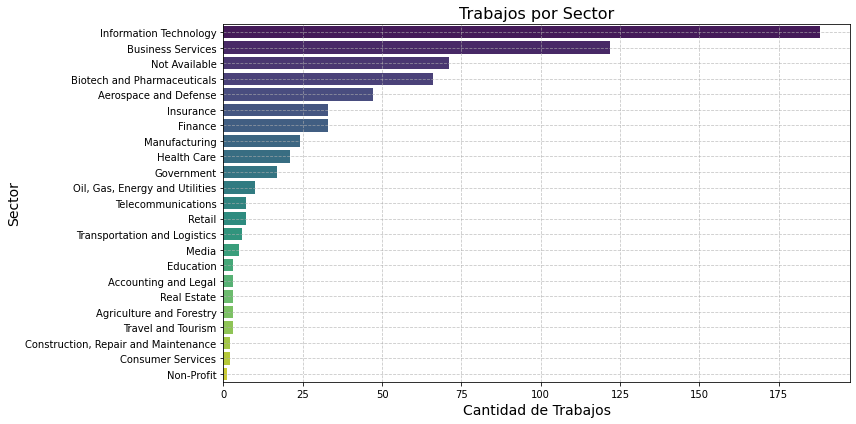

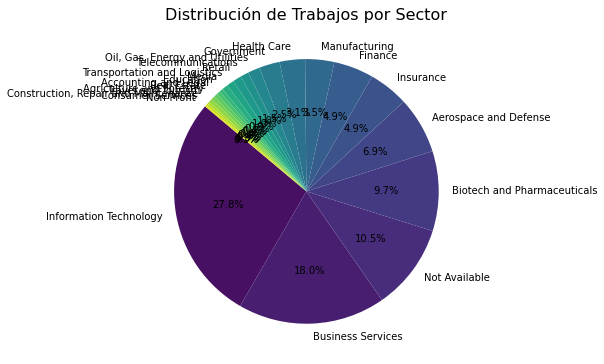

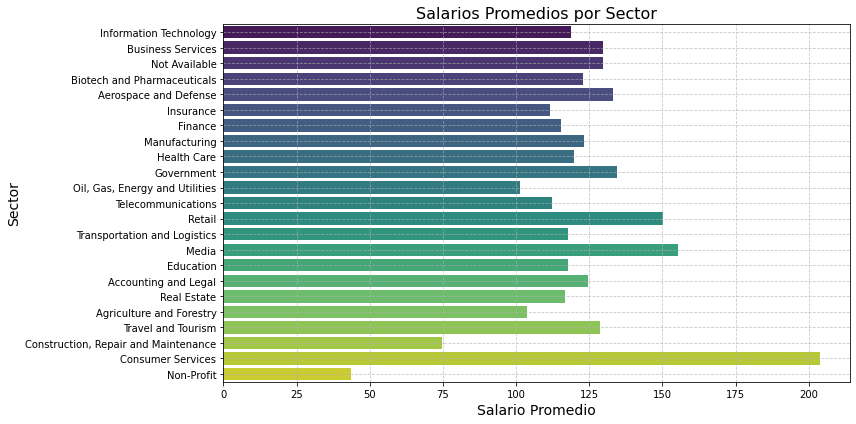

In [0]:
# Agrupar por sector y calcular métricas
sector_analysis = df.groupBy("Sector Cleaned").agg(
    count("*").alias("job_count"),
    avg((col("Salary Min") + col("Salary Max")) / 2).alias("avg_salary")
).orderBy(col("job_count").desc())

# Mostrar los resultados para verificar
sector_analysis.show()

# Recolectar los datos para graficar
sector_collected = sector_analysis.collect()

# Preparar los datos para visualización
sectors = [row["Sector Cleaned"] for row in sector_collected]
job_counts = [row["job_count"] for row in sector_collected]
avg_salaries = [row["avg_salary"] for row in sector_collected]


# Gráfico de barras para trabajos por sector
plt.figure(figsize=(12, 6))
sns.barplot(x=job_counts, y=sectors, palette="viridis")

plt.title("Trabajos por Sector", fontsize=16)
plt.xlabel("Cantidad de Trabajos", fontsize=14)
plt.ylabel("Sector", fontsize=14)
plt.grid(linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico de pastel para representación porcentual
plt.figure(figsize=(8, 8))
plt.pie(
    job_counts, 
    labels=sectors, 
    autopct="%1.1f%%", 
    startangle=140, 
    colors=sns.color_palette("viridis", len(sectors))
)
plt.title("Distribución de Trabajos por Sector", fontsize=16)
plt.tight_layout()
plt.show()

# Opcional: Gráfico de barras para salarios promedio por sector
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_salaries, y=sectors, palette="viridis")

plt.title("Salarios Promedios por Sector", fontsize=16)
plt.xlabel("Salario Promedio", fontsize=14)
plt.ylabel("Sector", fontsize=14)
plt.grid(linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## 8. Descripción de Trabajos (Job Description): Frecuencia de Palabras Clave

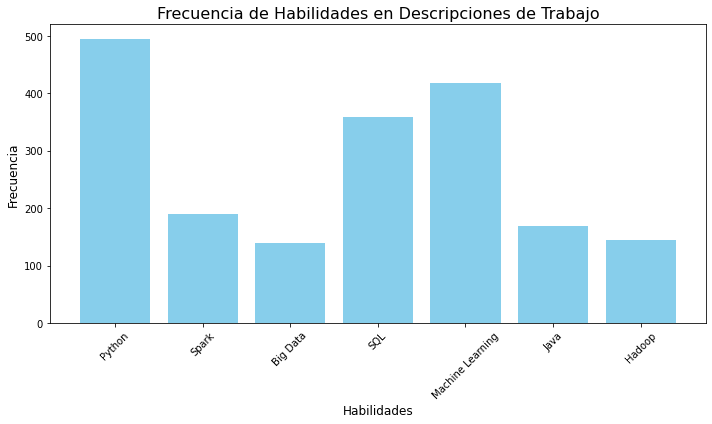

In [0]:
from pyspark.sql.functions import sum
from wordcloud import WordCloud
from pyspark.sql import functions as F


# Definir las habilidades principales que queremos buscar
skills = ['Python', 'Spark', 'Big Data', 'SQL', 'Machine Learning', 'Java', 'Hadoop']

# Crear columnas binarias para cada habilidad en función de su presencia en la descripción
for skill in skills:
    df = df.withColumn(
        f"{skill}_present",  # Nombre de la nueva columna
        F.when(F.col("Job Description").rlike(f"(?i){skill}"), 1).otherwise(0)  # Si el skill está en el Job Description, 1, de lo contrario 0
    )

# Contar cuántas veces aparece cada habilidad
skill_counts = df.select(
    *[F.sum(F.col(f"{skill}_present")).alias(f"{skill}_count") for skill in skills]
).collect()

# Preparar los datos para el gráfico de barras
skills_count = {skill: skill_counts[0][f"{skill}_count"] for skill in skills}

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(skills_count.keys(), skills_count.values(), color='skyblue')

# Personalizar el gráfico
plt.title("Frecuencia de Habilidades en Descripciones de Trabajo", fontsize=16)
plt.xlabel("Habilidades", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## 9. Relación entre Tipo de Propiedad (Type of ownership) y Salario

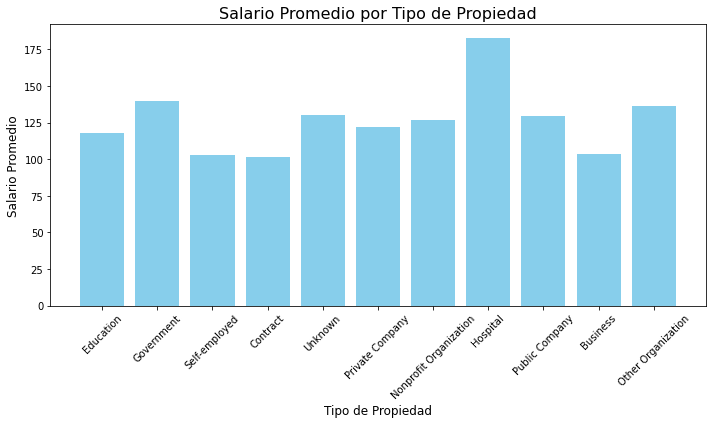

In [0]:
# Calcular el salario promedio como el promedio de 'Salary Min' y 'Salary Max'
df = df.withColumn(
    "Average Salary",
    (F.col("Salary Min") + F.col("Salary Max")) / 2
)

# Agrupar por 'Type of ownership' y calcular el salario promedio
salary_by_ownership = df.groupBy("Type of ownership").agg(
    F.avg("Average Salary").alias("Average Salary")
)

# Recoger los resultados para poder graficarlos
salary_by_ownership_pd = salary_by_ownership.toPandas()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(salary_by_ownership_pd["Type of ownership"], salary_by_ownership_pd["Average Salary"], color='skyblue')

# Personalizar el gráfico
plt.title("Salario Promedio por Tipo de Propiedad", fontsize=16)
plt.xlabel("Tipo de Propiedad", fontsize=12)
plt.ylabel("Salario Promedio", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## 10.Análisis de la Relación entre la Antigüedad de la Empresa y el Tipo de Propiedad

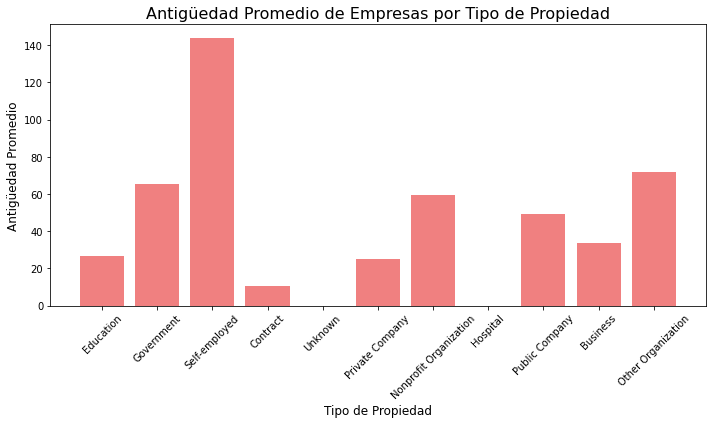

In [0]:
# Calcular la antigüedad de la empresa
df = df.withColumn("Company Age", 2024 - F.col("Founded").cast("int"))

# Agrupar por 'Type of ownership' y calcular la antigüedad promedio
age_by_ownership = df.groupBy("Type of ownership").agg(
    F.avg("Company Age").alias("Average Company Age")
)

# Recoger los resultados para graficarlos
age_by_ownership_pd = age_by_ownership.toPandas()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(age_by_ownership_pd["Type of ownership"], age_by_ownership_pd["Average Company Age"], color='lightcoral')

# Personalizar el gráfico
plt.title("Antigüedad Promedio de Empresas por Tipo de Propiedad", fontsize=16)
plt.xlabel("Tipo de Propiedad", fontsize=12)
plt.ylabel("Antigüedad Promedio", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Distribución de Salarios por Sector y Tipo de Propiedad

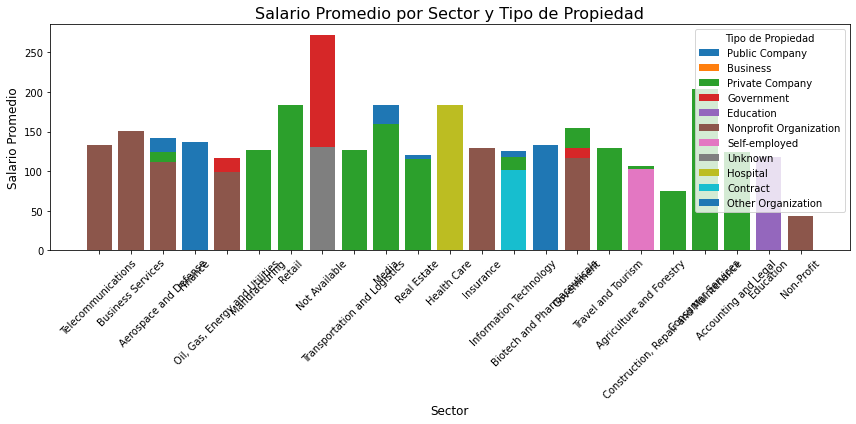

In [0]:
df = df.withColumn(
    "Average Salary",
    (F.col("Salary Min") + F.col("Salary Max")) / 2
)

# Agrupar por 'Sector Cleaned' y 'Type of ownership' y calcular salario promedio
salary_by_sector_ownership = df.groupBy("Sector Cleaned", "Type of ownership").agg(
    F.avg("Average Salary").alias("Average Salary")
)

# Recoger los resultados para graficarlos
salary_by_sector_ownership_pd = salary_by_sector_ownership.toPandas()

# Crear gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
for ownership in salary_by_sector_ownership_pd["Type of ownership"].unique():
    subset = salary_by_sector_ownership_pd[salary_by_sector_ownership_pd["Type of ownership"] == ownership]
    plt.bar(subset["Sector Cleaned"], subset["Average Salary"], label=ownership)

# Personalizar el gráfico
plt.title("Salario Promedio por Sector y Tipo de Propiedad", fontsize=16)
plt.xlabel("Sector", fontsize=12)
plt.ylabel("Salario Promedio", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Tipo de Propiedad")
plt.tight_layout()

# Mostrar el gráfico
plt.show()